In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("election-context-2018.csv")
df_info = df.info()
df_head = df.head()
df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3114 non-null   object 
 1   county                  3114 non-null   object 
 2   fips                    3114 non-null   int64  
 3   trump16                 3114 non-null   int64  
 4   clinton16               3114 non-null   int64  
 5   otherpres16             3114 non-null   int64  
 6   romney12                3114 non-null   int64  
 7   obama12                 3114 non-null   int64  
 8   otherpres12             3114 non-null   int64  
 9   demsen16                1942 non-null   float64
 10  repsen16                1942 non-null   float64
 11  othersen16              1942 non-null   float64
 12  demhouse16              2862 non-null   float64
 13  rephouse16              2862 non-null   float64
 14  otherhouse16            2862 non-null   

(None,
      state   county  fips  trump16  clinton16  otherpres16  romney12  obama12  \
 0  Alabama  Autauga  1001    18172       5936          865     17379     6363   
 1  Alabama  Baldwin  1003    72883      18458         3874     66016    18424   
 2  Alabama  Barbour  1005     5454       4871          144      5550     5912   
 3  Alabama     Bibb  1007     6738       1874          207      6132     2202   
 4  Alabama   Blount  1009    22859       2156          573     20757     2970   
 
    otherpres12  demsen16  ...  age29andunder_pct  age65andolder_pct  \
 0          190    6331.0  ...          40.037058          13.978456   
 1          898   19145.0  ...          35.474412          18.714851   
 2           47    4777.0  ...          37.664387          16.528895   
 3           86    2082.0  ...          37.329435          14.885699   
 4          279    2980.0  ...          37.240053          17.192916   
 
    median_hh_inc  clf_unemploy_pct  lesshs_pct  lesscollege_pct 

In [4]:
# Identify columns with missing values and their proportions
missing_values = df.isnull().mean().sort_values(ascending=False)
missing_values_percentage = missing_values * 100

# Display columns with missing values
missing_values_percentage

othergov16                80.700064
repgov16                  80.700064
demgov16                  80.700064
othersen16                37.636480
demsen16                  37.636480
repsen16                  37.636480
demgov14                  31.021195
othergov14                31.021195
repgov14                  31.021195
rephouse16                 8.092486
demhouse16                 8.092486
otherhouse16               8.092486
median_hh_inc              0.096339
total_population           0.096339
foreignborn_pct            0.096339
nonwhite_pct               0.096339
hispanic_pct               0.096339
black_pct                  0.096339
white_pct                  0.096339
cvap                       0.096339
female_pct                 0.096339
clf_unemploy_pct           0.096339
age65andolder_pct          0.096339
lesscollege_whites_pct     0.096339
lesshs_whites_pct          0.096339
lesscollege_pct            0.096339
lesshs_pct                 0.096339
age29andunder_pct          0

In [5]:
columns_to_drop = [
    'othergov16', 'repgov16', 'demgov16',
    'othersen16', 'demsen16', 'repsen16',
    'demgov14', 'othergov14', 'repgov14'
]
df_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values for numeric columns with median
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda x: x.fillna(x.median()))


# Check if there are any remaining missing values
remaining_missing_values = df_cleaned.isnull().sum()

remaining_missing_values

state                     0
county                    0
fips                      0
trump16                   0
clinton16                 0
otherpres16               0
romney12                  0
obama12                   0
otherpres12               0
demhouse16                0
rephouse16                0
otherhouse16              0
total_population          0
cvap                      0
white_pct                 0
black_pct                 0
hispanic_pct              0
nonwhite_pct              0
foreignborn_pct           0
female_pct                0
age29andunder_pct         0
age65andolder_pct         0
median_hh_inc             0
clf_unemploy_pct          0
lesshs_pct                0
lesscollege_pct           0
lesshs_whites_pct         0
lesscollege_whites_pct    0
rural_pct                 0
ruralurban_cc             0
dtype: int64

In [6]:
df_cleaned.dtypes


state                      object
county                     object
fips                        int64
trump16                     int64
clinton16                   int64
otherpres16                 int64
romney12                    int64
obama12                     int64
otherpres12                 int64
demhouse16                float64
rephouse16                float64
otherhouse16              float64
total_population          float64
cvap                      float64
white_pct                 float64
black_pct                 float64
hispanic_pct              float64
nonwhite_pct              float64
foreignborn_pct           float64
female_pct                float64
age29andunder_pct         float64
age65andolder_pct         float64
median_hh_inc             float64
clf_unemploy_pct          float64
lesshs_pct                float64
lesscollege_pct           float64
lesshs_whites_pct         float64
lesscollege_whites_pct    float64
rural_pct                 float64
ruralurban_cc 

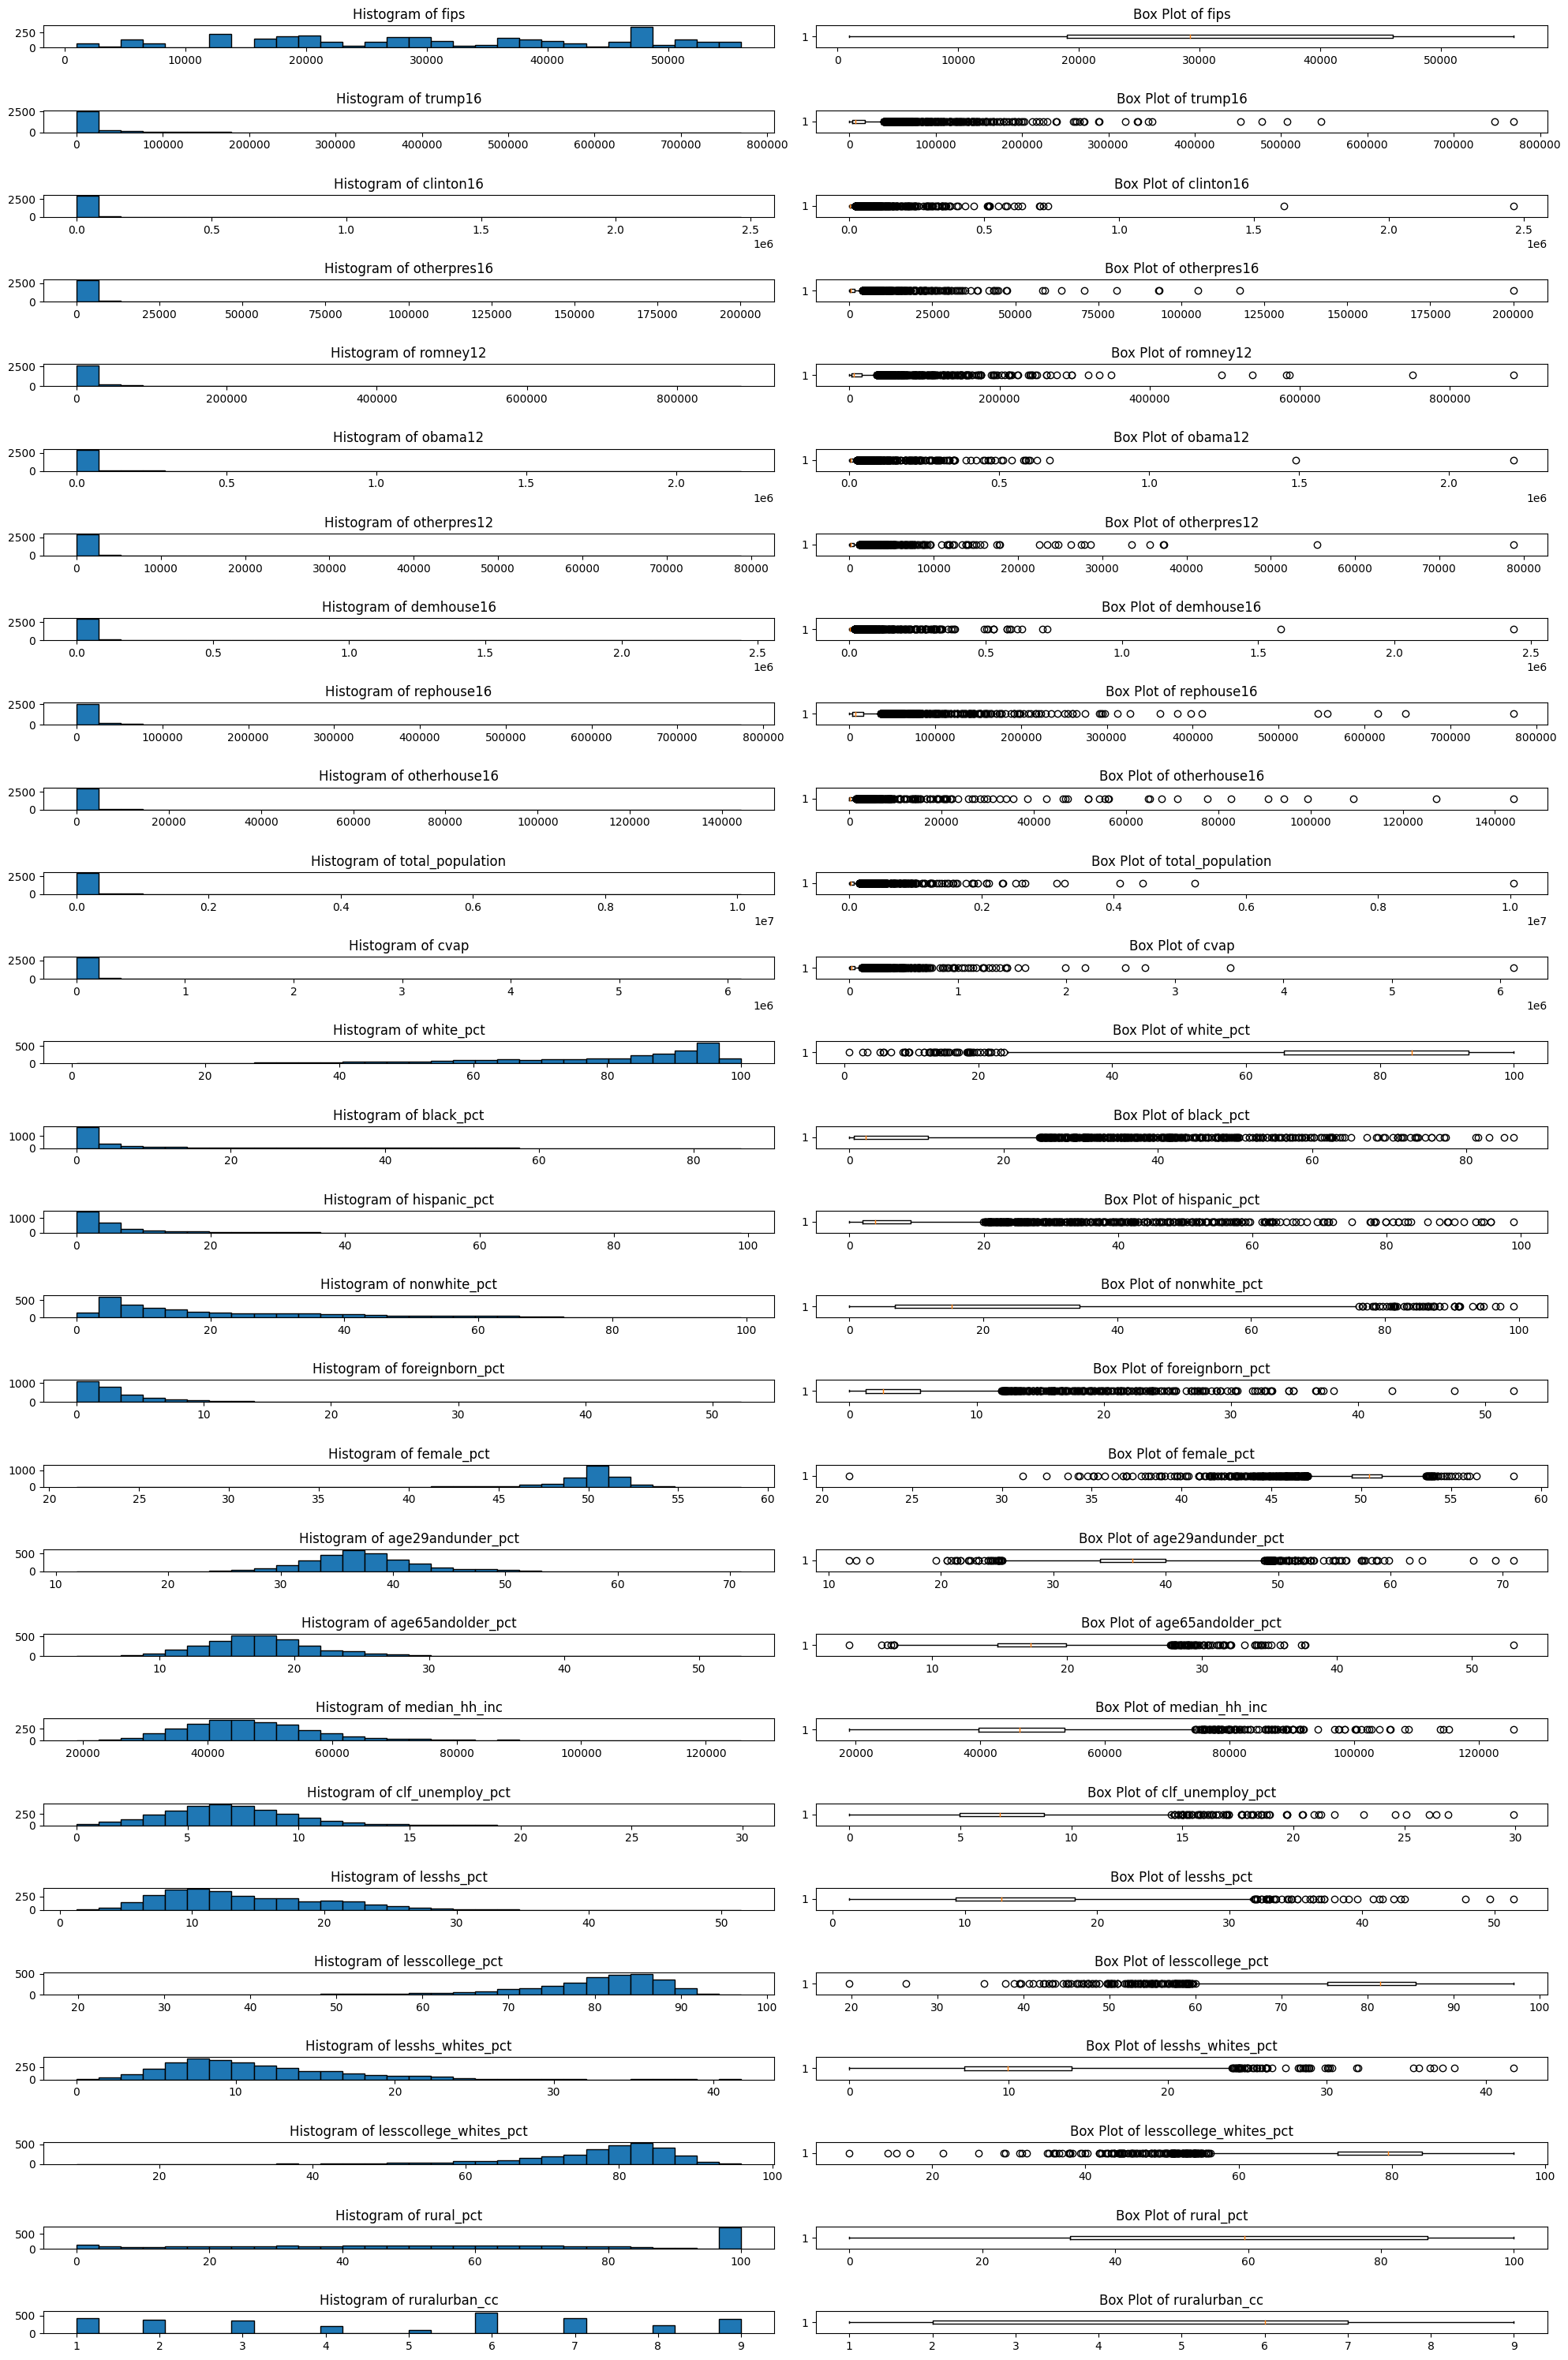

,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demhouse16,rephouse16,otherhouse16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
count,3114.000000,3114.000000,3.114000e+03,3114.000000,3114.000000,3.114000e+03,3114.000000,3.114000e+03,3114.000000,3114.000000,...,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,30660.117855,20171.786448,2.110600e+04,2459.164419,19433.805716,2.106226e+04,839.764611,1.942055e+04,20164.181118,1481.389210,...,37.342017,17.634027,47816.128131,7.063805,14.224199,79.218653,11.043423,77.003384,58.470671,4.984586
std,14984.811176,43162.140286,8.052001e+04,7514.783991,44577.392198,7.401418e+04,2949.902265,7.746032e+04,44097.428792,7088.590843,...,5.437118,4.439952,12476.444698,3.227299,6.540416,9.134634,5.325321,10.354206,31.454410,2.701992
min,1001.000000,0.000000,0.000000e+00,0.000000,54.000000,5.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,11.842105,3.854570,18972.000000,0.000000,1.278772,19.789880,0.000000,9.188199,0.000000,1.000000
25%,19039.500000,3216.250000,1.170000e+03,183.000000,2909.000000,1.553000e+03,74.000000,7.892500e+02,3387.250000,0.000000,...,34.173636,14.834522,39693.500000,4.959633,9.308632,75.335805,7.233746,72.903353,33.215524,2.000000
50%,29210.000000,7239.500000,3.178000e+03,499.000000,6445.500000,3.999000e+03,179.000000,2.790500e+03,7271.500000,87.000000,...,37.000969,17.280145,46250.000000,6.761641,12.773185,81.474694,9.938900,79.452055,59.412038,6.000000
75%,46006.500000,17886.000000,9.827750e+03,1674.000000,16315.250000,1.134850e+04,529.750000,8.615500e+03,16666.500000,592.000000,...,39.980390,19.932037,53548.000000,8.774798,18.302951,85.564768,13.944038,83.913772,86.972185,7.000000
max,56045.000000,769743.000000,2.464364e+06,200201.000000,885333.000000,2.216903e+06,78831.000000,2.438810e+06,774172.000000,144108.000000,...,70.981316,53.106375,125672.000000,29.927415,51.479358,97.014925,41.758287,95.918367,100.000000,9.000000


In [7]:
summary_statistics = df_cleaned.describe()

# Visualizations
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Histograms and Box Plots
plt.figure(figsize=(20, 30))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i*2-1)
    plt.hist(df_cleaned[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')

    plt.subplot(len(numeric_columns), 2, i*2)
    plt.boxplot(df_cleaned[column].dropna(), vert=False)
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

summary_statistics

# Research Question 1

In [39]:
# Extract relevant columns
relevant_data = df[['white_pct', 'trump16', 'clinton16', 'otherpres16']]

# Calculate the total number of votes in 2016 for each county
relevant_data['total_votes16'] = relevant_data['trump16'] + relevant_data['clinton16'] + relevant_data['otherpres16']

# Display the first few rows to verify the calculations
relevant_data.head()


<ipython-input-39-e597f99c280c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['total_votes16'] = relevant_data['trump16'] + relevant_data['clinton16'] + relevant_data['otherpres16']


,white_pct,trump16,clinton16,otherpres16,total_votes16
0,75.683482,18172,5936,865,24973
1,83.178788,72883,18458,3874,95215
2,45.885624,5454,4871,144,10469
3,74.765196,6738,1874,207,8819
4,87.657701,22859,2156,573,25588


<ipython-input-40-62ed9cb895c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['white_votes_pct'] = (relevant_data['total_votes16'] * relevant_data['white_pct']) / 100


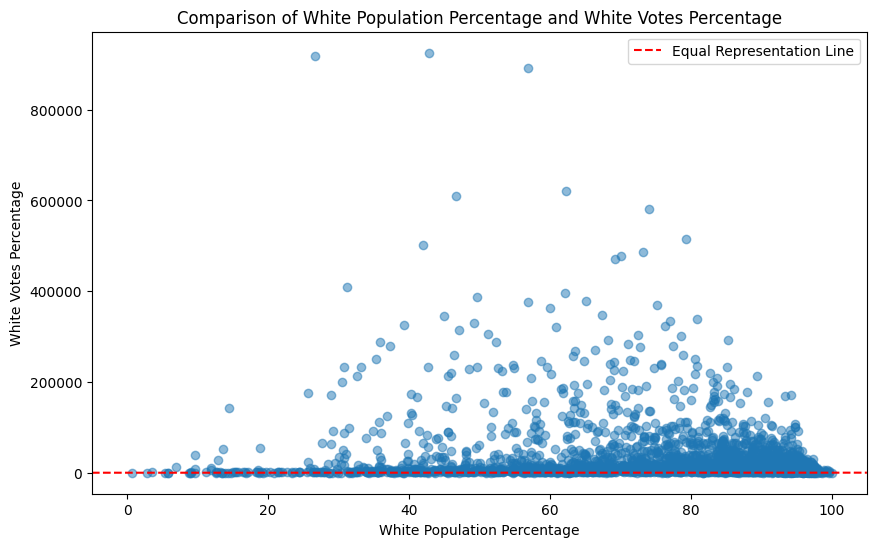

In [40]:

# Calculate the percentage of votes for each county
relevant_data['white_votes_pct'] = (relevant_data['total_votes16'] * relevant_data['white_pct']) / 100

# Display a few rows to verify
relevant_data.head()

# Scatter plot to visualize the comparison
plt.figure(figsize=(10, 6))
plt.scatter(relevant_data['white_pct'], relevant_data['white_votes_pct'], alpha=0.5)
plt.xlabel('White Population Percentage')
plt.ylabel('White Votes Percentage')
plt.title('Comparison of White Population Percentage and White Votes Percentage')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Equal Representation Line')
plt.legend()
plt.show()


The scatter plot compares the white population percentage to the inferred white votes percentage for each county. The red dashed line represents an equal representation line where the percentage of white voters matches the percentage of the white population.

Points above the line indicate counties where the white voter percentage exceeds their demographic percentage, suggesting that white people are voting beyond their demographic representation in those counties.

# Research Question 2

In [10]:

# Create a new column 'voting_preference'
df_cleaned['voting_preference_age'] = np.where(df_cleaned['clinton16'] > df_cleaned['trump16'], 'Democrat', 'Republican')

# Group by 'voting_preference' and calculate the mean values of 'age29andunder_pct' and 'age65andolder_pct'
age_pref = df_cleaned.groupby('voting_preference_age')[['age29andunder_pct', 'age65andolder_pct']].mean()

# Display the resulting summary DataFrame
age_pref


,age29andunder_pct,age65andolder_pct
voting_preference_age,,
Democrat,40.268219,14.812041
Republican,36.795585,18.160998


In [11]:
# prompt: education preference

# Create a new column 'education_preference'
df_cleaned['education_preference'] = np.where(df_cleaned['clinton16'] > df_cleaned['trump16'],  'Democrat', 'Republican')

# Group by 'education_preference' and calculate the mean values of 'clinton16' and 'trump16'
education_pref = df_cleaned.groupby('education_preference')[['lesshs_pct', 'lesscollege_pct']].mean()

# Display the resulting summary DataFrame
education_pref


,lesshs_pct,lesscollege_pct
education_preference,,
Democrat,14.566899,70.788500
Republican,14.160204,80.792882


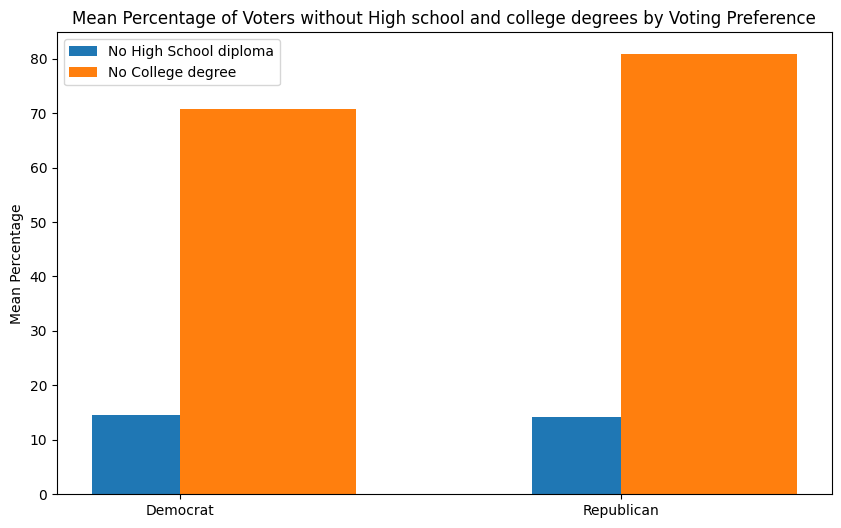

In [12]:
# Create a bar chart to visualize the mean percentages of younger and older voters for Democrat and Republican voting preferences
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the bar chart
labels = ['Democrat', 'Republican']
No_HighSchool = education_pref['lesshs_pct']
No_College = education_pref['lesscollege_pct']

# Create bar positions
x = range(len(labels))

# Plot the bars
ax.bar(x, No_HighSchool, width=0.4, label='No High School diploma', align='center')
ax.bar(x, No_College, width=0.4, label='No College degree', align='edge')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Percentage')
ax.set_title('Mean Percentage of Voters without High school and college degrees by Voting Preference')
ax.legend()

# Display the bar chart
plt.show()

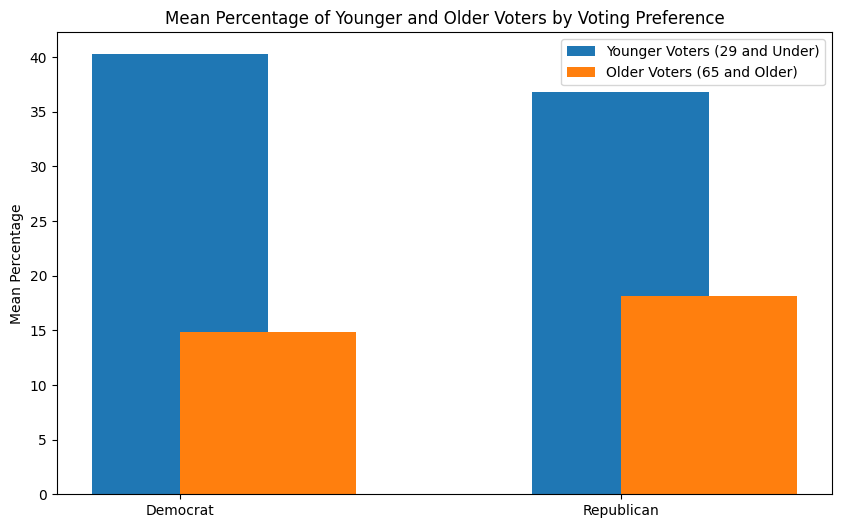

In [13]:

# Create a bar chart to visualize the mean percentages of younger and older voters for Democrat and Republican voting preferences
fig, ax = plt.subplots(figsize=(10, 6))

# Data for the bar chart
labels = ['Democrat', 'Republican']
younger_voters = age_pref['age29andunder_pct']
older_voters = age_pref['age65andolder_pct']

# Create bar positions
x = range(len(labels))

# Plot the bars
ax.bar(x, younger_voters, width=0.4, label='Younger Voters (29 and Under)', align='center')
ax.bar(x, older_voters, width=0.4, label='Older Voters (65 and Older)', align='edge')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Mean Percentage')
ax.set_title('Mean Percentage of Younger and Older Voters by Voting Preference')
ax.legend()

# Display the bar chart
plt.show()


# Research Question 3

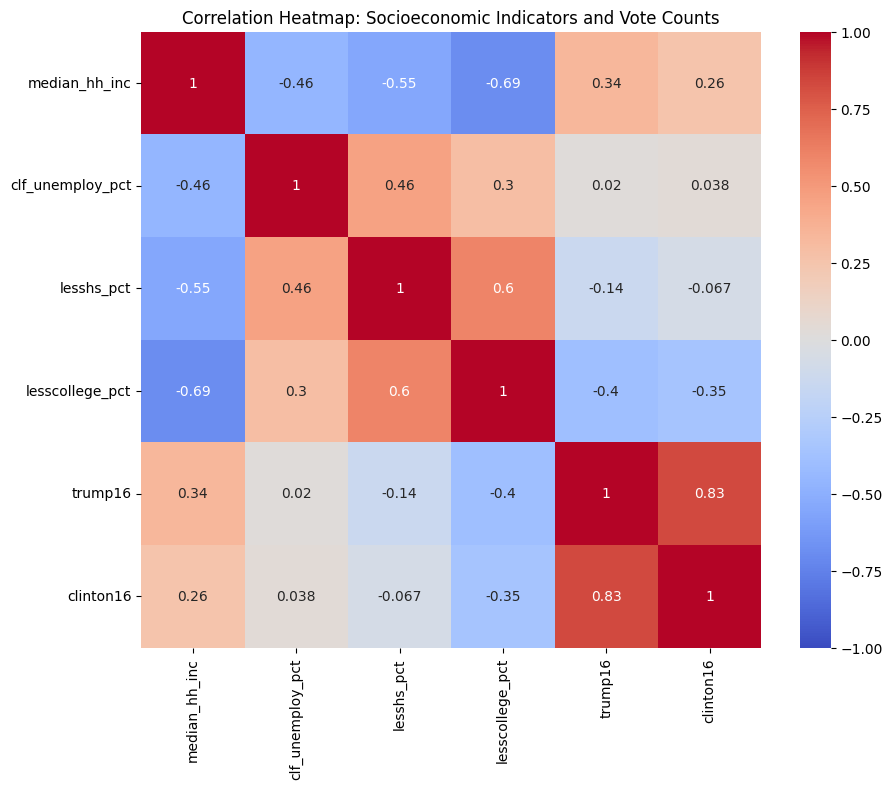

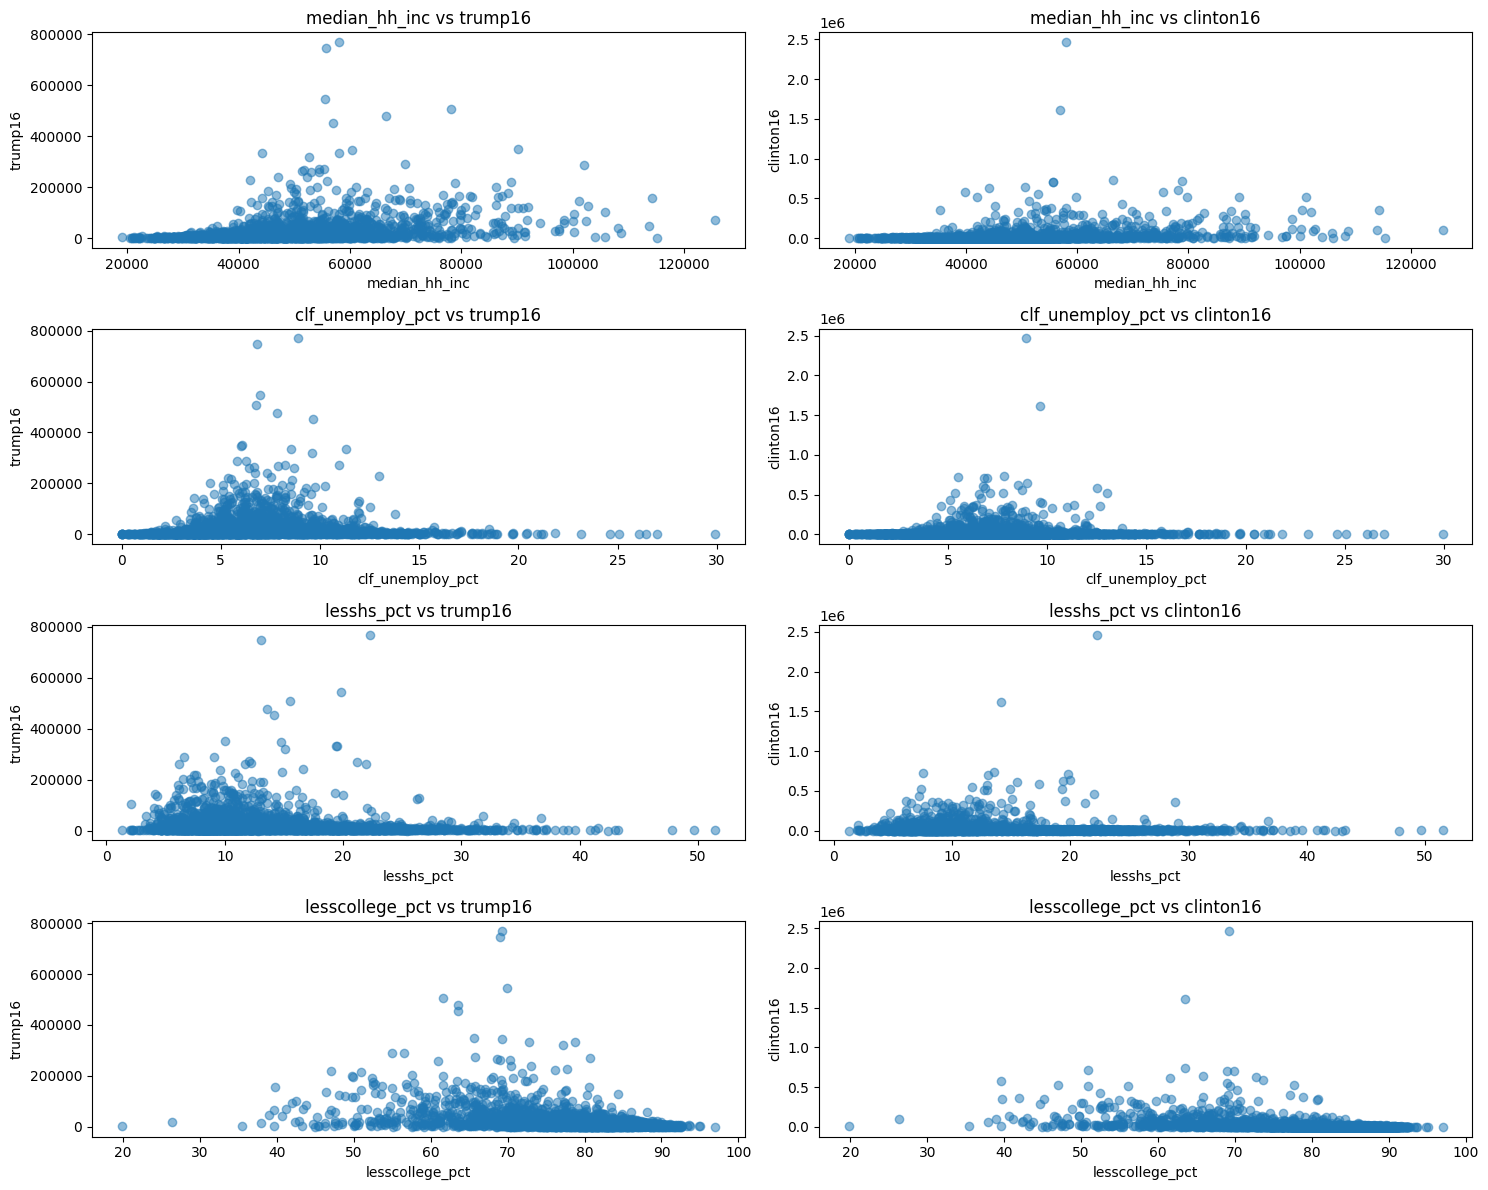

In [14]:

# Select relevant columns
socioeconomic_indicators = ['median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct']
vote_counts = ['trump16', 'clinton16']

# Calculate correlation matrix
correlation_matrix = df_cleaned[socioeconomic_indicators + vote_counts].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Socioeconomic Indicators and Vote Counts')
plt.show()

# Visualize correlations using scatter plots
fig, axes = plt.subplots(len(socioeconomic_indicators), len(vote_counts), figsize=(15, 12))

for i, indicator in enumerate(socioeconomic_indicators):
    for j, vote_count in enumerate(vote_counts):
        axes[i, j].scatter(df_cleaned[indicator], df_cleaned[vote_count], alpha=0.5)
        axes[i, j].set_xlabel(indicator)
        axes[i, j].set_ylabel(vote_count)
        axes[i, j].set_title(f'{indicator} vs {vote_count}')

plt.tight_layout()
plt.show()


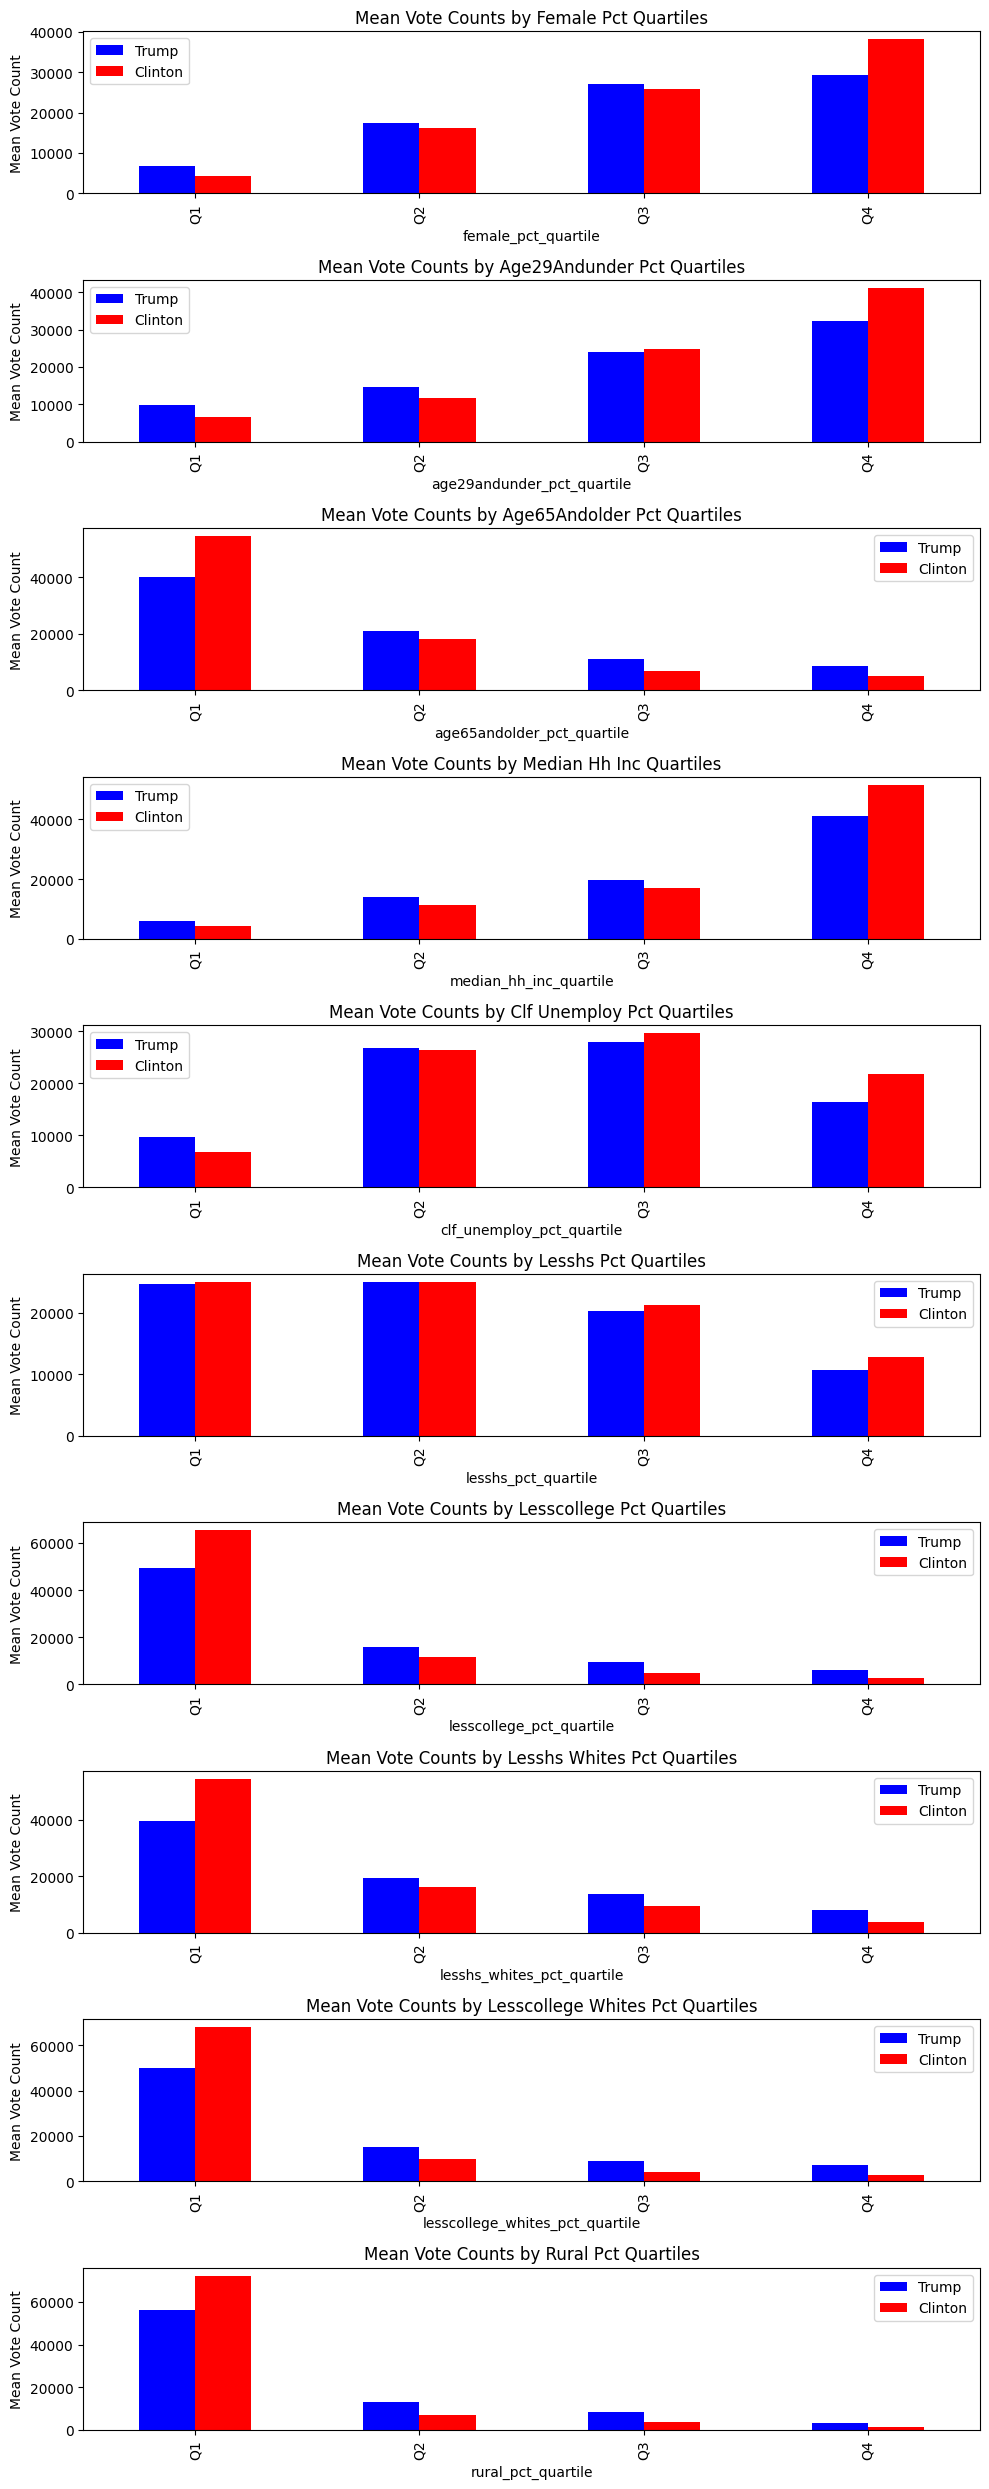

In [42]:
# Function to create segmented bar charts for specified variables
def plot_segmented_bar_charts(data, variable, title, ax):
    # Create quartiles for the specified variable
    data[f'{variable}_quartile'] = pd.qcut(data[variable], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    # Group by the quartiles and calculate mean vote counts
    education_segments = data.groupby(f'{variable}_quartile')[['trump16', 'clinton16']].mean().reset_index()

    # Plot segmented bar charts
    education_segments.plot(kind='bar', x=f'{variable}_quartile', ax=ax, title=title, color=['blue', 'red'])
    ax.set_ylabel('Mean Vote Count')
    ax.legend(['Trump', 'Clinton'])

# List of variables to plot
variables =['female_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct']


# Create subplots
fig, axs = plt.subplots(len(variables), 1, figsize=(10, 25))

# Generate plots for each variable
for i, variable in enumerate(variables):
    plot_segmented_bar_charts(df, variable, f'Mean Vote Counts by {variable.replace("_", " ").title()} Quartiles', axs[i])

# Adjust layout
plt.tight_layout()
plt.show()
